In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
# from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
# from sklearn.preprocessing import normalize
import scipy.io
import scipy.optimize as op

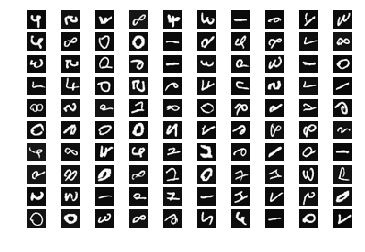

In [2]:
mat = scipy.io.loadmat('./ex3/ex3data1.mat')
X = mat.get('X')
y = mat.get('y')

images_count = len(X)
display_count = 10
img_size = int(math.sqrt(len(X[0])))

random_images = X[np.random.choice(len(X), display_count ** 2)]

for i in range(display_count):
    for j in range(display_count):
        img_num = i * 10 + j
        img = random_images[img_num].reshape(img_size, img_size)
        plt.subplot(display_count, display_count, img_num + 1)
        plt.imshow(img, cmap='Greys_r')
        plt.axis('off')
plt.show()

ones = np.ones((images_count, 1))
X = np.column_stack((ones, X))

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def compute_cost(theta, X, y, lambdaa=0, reg=True):
    h = sigmoid(X.dot(theta))
    m = len(y)
    cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
#     cost = 1 / m * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
#     cost = cost[0]
    if reg:
        theta_reg = theta[1:]
        cost_reg = lambdaa / 2 / m * (theta_reg.T.dot(theta_reg))
        cost += cost_reg
    return cost

def create_compute_cost(lambdaa=0, reg=True):
    return lambda theta, X, y: compute_cost(theta, X, y, lambdaa, reg=reg)

def gradient_descent_step(theta, X, y):
    n = len(theta)
    theta = theta.reshape(n, 1)
    h = sigmoid(X.dot(theta))
    theta = X.T.dot(h - y) / len(X)
    return theta.reshape(n)

def fit(X, y, compute_cost=compute_cost, method='TNC'):
    result = op.minimize(fun = compute_cost,
                         x0 = np.zeros(len(X[0])),
                         args = (X, y),
                         method = method,
                         jac = gradient_descent_step)
    
    return result.x

In [4]:
num_labels = 10

def predict(thetas, X):
    return sigmoid(X.dot(thetas.T))

def calculate_error_rate(lambdaa=0):
    all_thetas = []

    for i in range(1, 11):
        temp_y = np.copy(y)
        temp_y[y != i] = 0
        temp_y[y == i] = 1
        all_thetas.append(fit(X, temp_y, create_compute_cost(lambdaa, reg=True)))

    all_thetas = np.array(all_thetas)

    predictions = predict(all_thetas, X)
    predictions = np.argmax(predictions, axis=1) + 1 # to correct prediction index as 0 is 10 and 1 is 1

    num_errors = 0
    for prediction, actual in zip(predictions, y.T[0]):
        num_errors += 0 if prediction == actual else 1
    return num_errors

total_examples = len(y)
num_errors = calculate_error_rate(0.01)

# lambdas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
# lambdas = [0.001, 0.003, 0.01]
lambdas = [0.001]
errors = map(calculate_error_rate, lambdas)
error_rates = list(map(lambda error: (total_examples - error) / total_examples * 100, errors))

print(error_rates)

# plt.plot(lambdas, error_rates, '-')
# plt.title('Error rates')
# plt.show()
    
# print('total: {}, errors: {}'.format(total_examples, num_errors))
# print('percent of valid: {:.2f}'.format((total_examples - num_errors) / total_examples * 100))

[76.53999999999999]


In [5]:
mat = scipy.io.loadmat('./ex3/ex3weights.mat')
Theta1 = mat.get('Theta1')
Theta2 = mat.get('Theta2')

def predict(X, Theta1, Theta2):
    A = sigmoid(X.dot(Theta1.T))
    
    ones = np.ones((len(A), 1))
    A = np.column_stack((ones, A))
    
    A2 = sigmoid(A.dot(Theta2.T))
    
    return np.argmax(A2, axis=1) + 1
    
randomIndices = np.random.choice(len(X), 10)

print(predict(X[randomIndices,], Theta1, Theta2))
print(y[randomIndices].T[0])

[2 5 2 5 5 1 2 4 5 9]
[2 5 2 5 5 1 2 4 5 9]
